In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [41]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

In [42]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [43]:
female_df = asd_2018_df[asd_2018_df['Sex']=='f']

In [44]:
female_df = female_df.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

In [45]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# encoder = OneHotEncoder()
encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Sex','Jaundice','Family_mem_with_ASD']
target = ['ASD_Traits']

In [46]:
from sklearn.model_selection import train_test_split

X = female_df.drop("ASD_Traits", axis=1)
y = female_df["ASD_Traits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [47]:
print(y_test)

241     Yes
1017    Yes
185     Yes
910     Yes
18       No
       ... 
587     Yes
701      No
527     Yes
438     Yes
768      No
Name: ASD_Traits, Length: 96, dtype: object


In [64]:
X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
for c in char_vals:
  X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
  X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
# y_train = encoder.fit_transform(y_train.values.reshape(-1,1))
# y_test = encoder.transform(y_test.values.reshape(-1,1))

c:\Users\kalin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kalin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print(y_test)

[1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0]


In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [55]:
metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall' : make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)}

In [56]:
def cross_validation_results(model, predictors, target, metrics):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test Precision: ", results['test_precision'].mean())
  print("Mean Test Recall: ", results['test_recall'].mean())
  print("Mean Test F1: ", results['test_f1_score'].mean())
  print("Accuracy: ", results['test_accuracy'].mean())

In [69]:
cross_validation_results(ada, X_train, y_train, metrics)

Mean Test Precision:  0.9803571428571429
Mean Test Recall:  0.9851648351648352
Mean Test F1:  0.981925925925926
Accuracy:  0.9776679841897234


In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision: ", precision_score(target, predictions))
  print("Recall: ", recall_score(target, predictions))
  print("F1: ", f1_score(target, predictions))
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

Accuracy:  0.96875
Precision:  0.9508196721311475
Recall:  1.0
F1:  0.9747899159663865


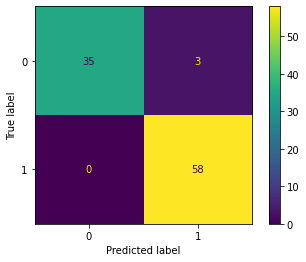

In [70]:
evaluate_on_test(ada, X_test, y_test)

In [61]:
def show_incorrectly_classified(predictors, predictions, target):
  for row_index, (input, prediction, label) in enumerate(zip(predictors.values, predictions, target)):
    if prediction != label:
        print('Row', row_index, 'has been classified as', prediction, 'and should be', label, "\nInput:",input)

In [71]:
show_incorrectly_classified(X_test, ada.predict(X_test), y_test)

Row 4 has been classified as 1 and should be 0 
Input: [1.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.70833333 0.
 0.         0.        ]
Row 32 has been classified as 1 and should be 0 
Input: [1.         0.         0.         1.         0.         1.
 0.         0.         0.         0.         0.70833333 0.
 0.         0.        ]
Row 40 has been classified as 1 and should be 0 
Input: [0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.91666667 0.
 0.         1.        ]
